The RDKit's [Contrib](https://github.com/rdkit/rdkit/tree/master/Contrib) directory includes implementations of two descriptors, `SA_Score` and `NP_Score`, which are not included in the core RDKit because they both use large data files. Still, the descriptors can be useful and questions about how to use them come up every once in a while, so here's a really short blog post showing how to use them.

Both descriptors are implemented in Python, so they're currently only accessible from Python. We're working on making them available in KNIME too (in fact this blog post was prompted by a question Alice at KNIME asked me as she was working on the node), but that's going to take a bit longer.

If you want to learn more about the descriptors themselves, the publications describing for those two descriptors are:

1. SA_Score: http://www.jcheminf.com/content/1/1/8  (this one is open access)
2. NP_Score: http://pubs.acs.org/doi/abs/10.1021/ci700286x  (this one is not open access)



In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdDepictor
rdDepictor.SetPreferCoordGen(True)
import rdkit
print(rdkit.__version__)

2023.09.2


We'll use a compound from one of the papers in J. Med. Chem.'s ASAP section as I was writing this post (https://pubs.acs.org/doi/10.1021/acs.jmedchem.3c01626). 

> Mini rant: it was easy for me to get the structure of this compound since J. Med. Chem. suggests that authors provide SMILES strings for the compounds in their papers and compliance is pretty good. Too bad this isn't true in computational/cheminformatics journals.


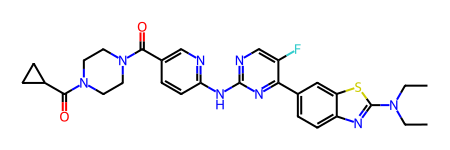

In [2]:
m  = Chem.MolFromSmiles('FC1=CN=C(NC2=NC=C(C(N3CCN(C(C4CC4)=O)CC3)=O)C=C2)N=C1C5=CC=C6N=C(N(CC)CC)SC6=C5')
m

# Using the RDKit installed from conda-forge

The Contrib directory is installed with the RDKit conda package, you just need to tell python to look in the appropriate place:

In [3]:
import sys
import os
sys.path.append(os.path.join(os.environ['CONDA_PREFIX'],'share','RDKit','Contrib'))

from SA_Score import sascorer
from NP_Score import npscorer

# Using the RDKit installed from pypi

When Chris (@kuelumbus on GitHub) packages the RDKit for pypi, he copies the Contrib directory into the rest of the Python code, so you do:

```
from rdkit.Contrib.SA_Score import sascorer
from rdkit.Contrib.NP_Score import npscorer
```

# Calculating the scores

This is the same regardless of how you have the RDKit installed:

In [4]:
sascorer.calculateScore(m)

2.8716389090191434

The SA_Score ranges from 1 to 10 with 1 being easy to make and 10 being hard to make.

In [5]:
fscore = npscorer.readNPModel()
npscorer.scoreMol(m,fscore)

reading NP model ...
model in


-1.960519718438019

The NP score ranges from -5 to 5, so this is pretty low.

You can also get a confidence value:

In [6]:
npscorer.scoreMolWConfidence(m,fscore)

NPLikeness(nplikeness=-1.960519718438019, confidence=1.0)

That's it for this post. As I said in the intro, it's a short one!